In [1]:
from auxiliarymethods import datasets as dp
from auxiliarymethods.reader import tud_to_networkx
import auxiliarymethods.auxiliary_methods as aux
import os
import numpy as np
from lib import *
import pickle
from matplotlib import pyplot as plt
from elki_parser import draw_graph

pickle_path = 'pickles'
# utility functions
def load_csv(path):
    return np.loadtxt(path, delimiter=";")

# hyper parameter
k = 500
delta_affine = .5
delta_dist = 1
alpha = .85
min_samples = 2

base_path = os.path.join("kernels", "without_labels")
ds_name = "IMDB-BINARY"

hierarchies = {}


for kernel in ("graphlet", "shortestpath", "wl1", "wl2", "wl3", "wl4", "wl5"):

    gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_{kernel}.csv"))
    gram = aux.normalize_gram_matrix(gram)

    if kernel.startswith("wl"):
        kernel = kernel[-1]


    print(kernel)

    try:
        # partitioning
        print("partitioning")
        try:
            # reading
            point_info = pickle.load(open(os.path.join(pickle_path, f'point_info_{kernel}_{k}_{alpha}.p'), 'rb'))
            partitions = pickle.load(open(os.path.join(pickle_path, f'partitions_{kernel}_{k}_{alpha}.p'), 'rb'))
        except:
            # *** COMPUTATION ***
            point_info, partitions = make_partitions(gram, k, alpha)
            # writing
            pickle.dump(point_info, open(os.path.join(pickle_path, f'point_info_{kernel}_{k}_{alpha}.p'), 'wb'))
            pickle.dump(partitions, open(os.path.join(pickle_path, f'partitions_{kernel}_{k}_{alpha}.p'), 'wb'))


        # clustering
        print("clustering")
        
        try:
            # reading
            models = pickle.load(open(os.path.join(pickle_path, f'models_{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
            clusters = pickle.load(open(os.path.join(pickle_path, f'clusters_{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
            cluster_info = pickle.load(open(os.path.join(pickle_path, f'cluster_info_{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
        except:
            # *** COMPUTATION ***
            models, clusters = cluster_partitions(gram, partitions, point_info, delta_affine, delta_dist, min_samples)
            cluster_info = compute_cluster_list(clusters, gram)
            # writing
            pickle.dump(models, open(os.path.join(pickle_path, f'models_{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))
            pickle.dump(clusters, open(os.path.join(pickle_path, f'clusters_{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))
            pickle.dump(cluster_info, open(os.path.join(pickle_path, f'cluster_info_{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))



        # hierarchy
        print("hierarchy")

        try:
            # reading
            hierarchy = pickle.load(open(os.path.join(pickle_path, f'hierarchy_{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'rb'))
        except:
            # *** COMPUTATION ***
            hierarchy = build_hierarchy(cluster_info, delta_affine, delta_dist, gram.shape[1])
            # writing
            pickle.dump(hierarchy, open(os.path.join(pickle_path, f'hierarchy_{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}.p'), 'wb'))

        hierarchies[f"{kernel}_{k}_{alpha}_{delta_affine}_{delta_dist}_{min_samples}"] = hierarchy

    except: pass





/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


graphlet
partitioning
clustering


/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/ERiC/lib.py:17: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(X, rowvar=False)
/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/markus/Documents/uni/W

shortestpath
partitioning
clustering


/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/ERiC/lib.py:17: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(X, rowvar=False)
/home/markus/Documents/uni/WS22/DM/P1/DataMiningAssignment/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/markus/Documents/uni/W

1
partitioning
clustering
hierarchy
2
partitioning
clustering
hierarchy
3
partitioning
clustering
hierarchy
4
partitioning
clustering
hierarchy
5
partitioning
clustering
hierarchy


Keys: 121


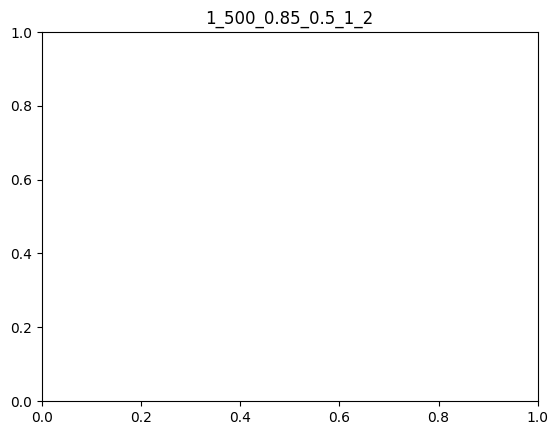

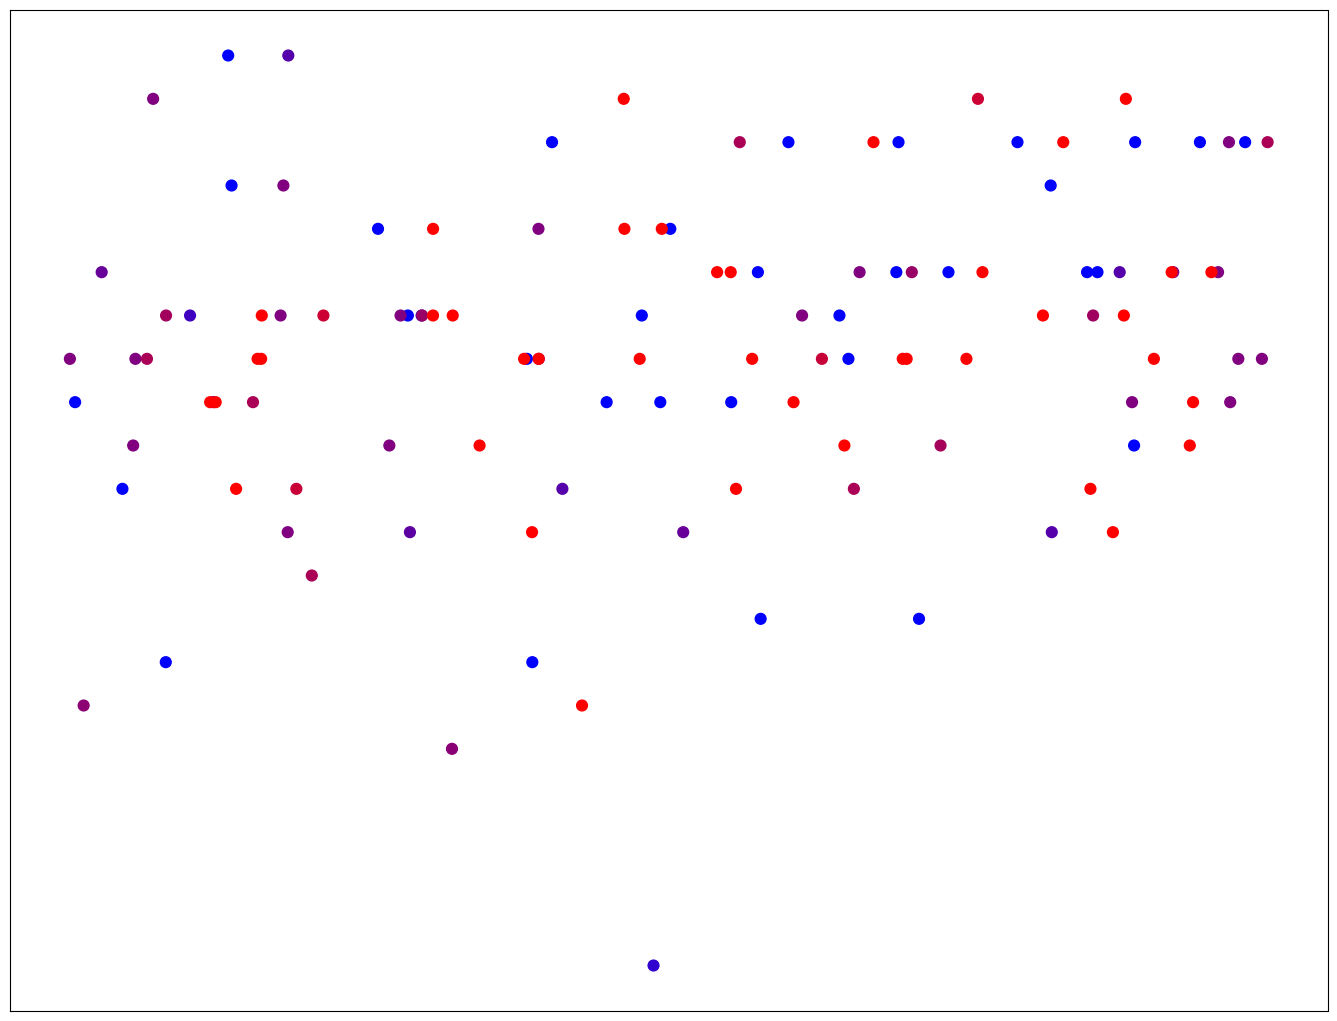

Keys: 121


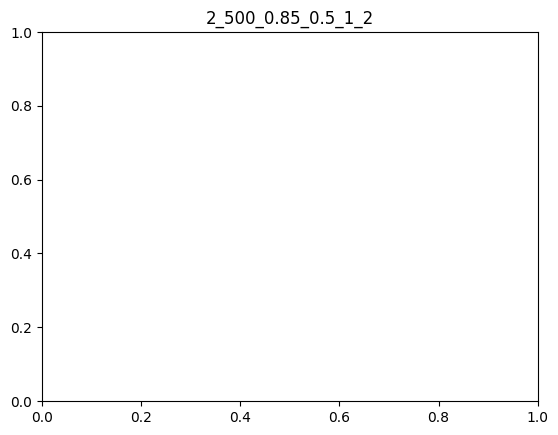

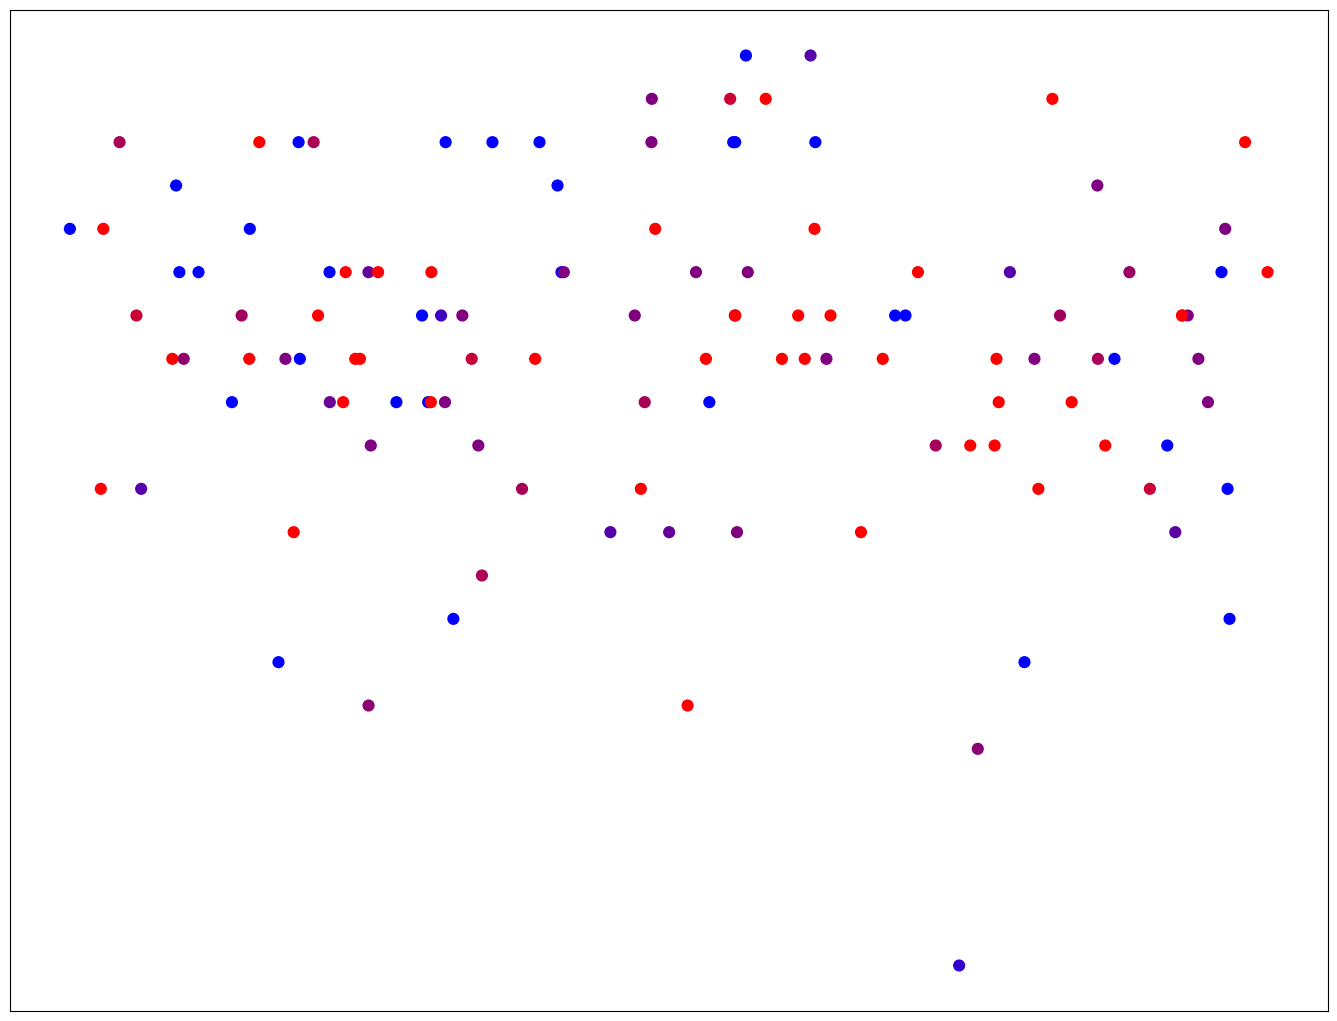

Keys: 121


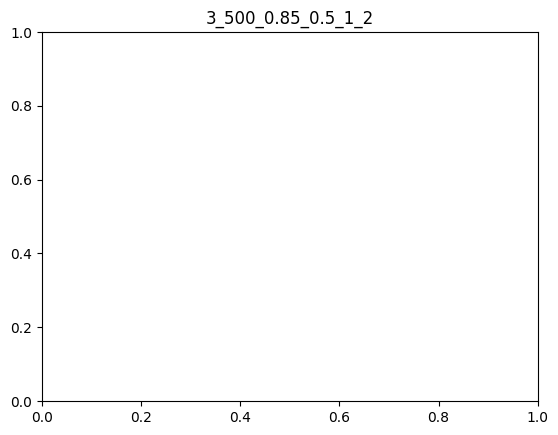

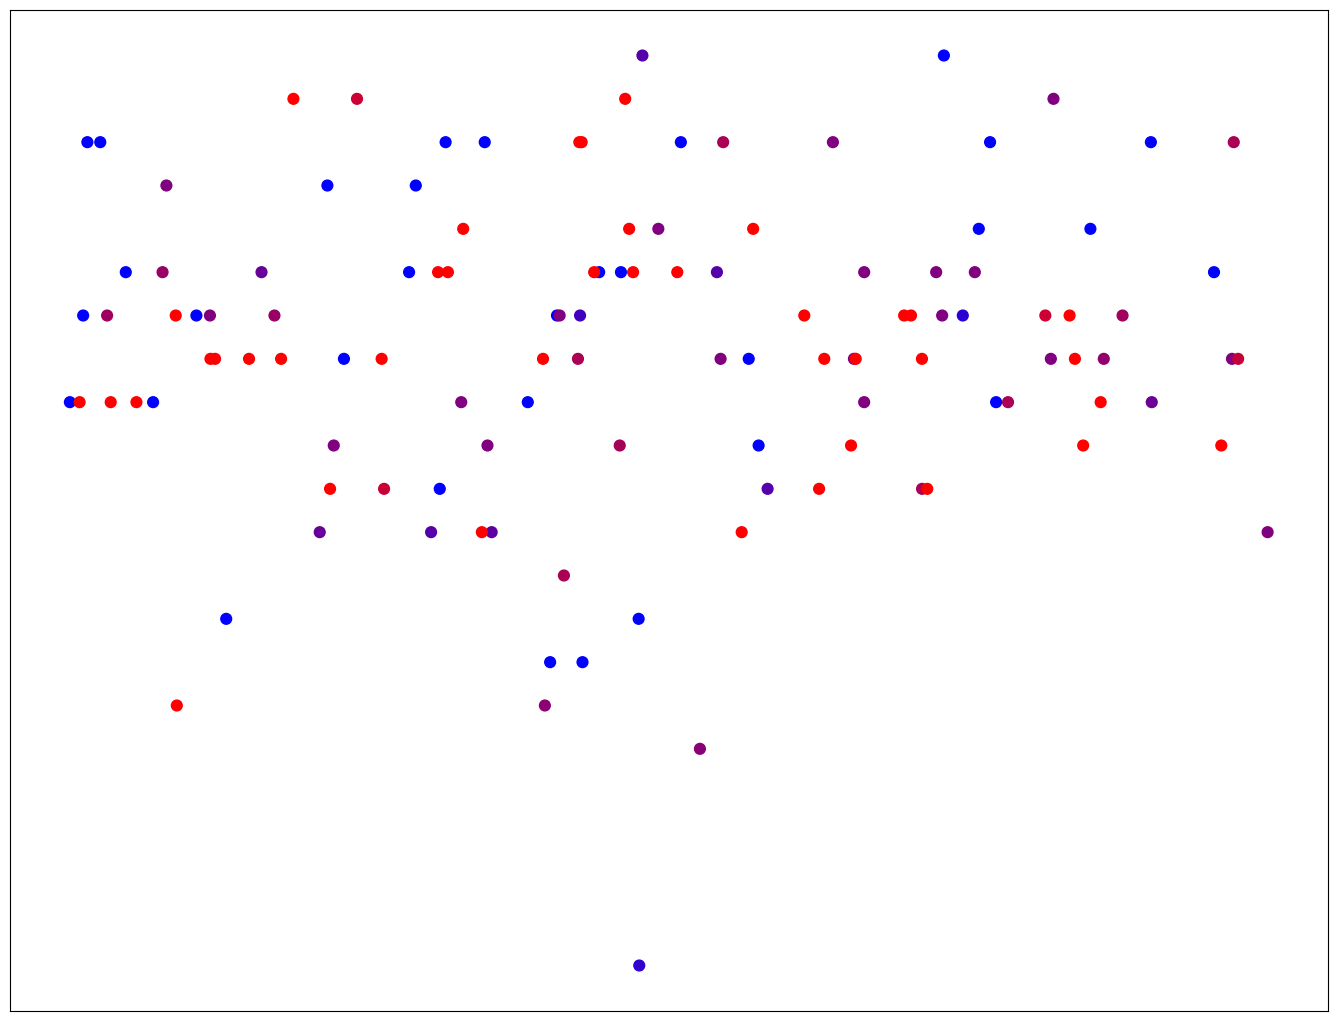

Keys: 121


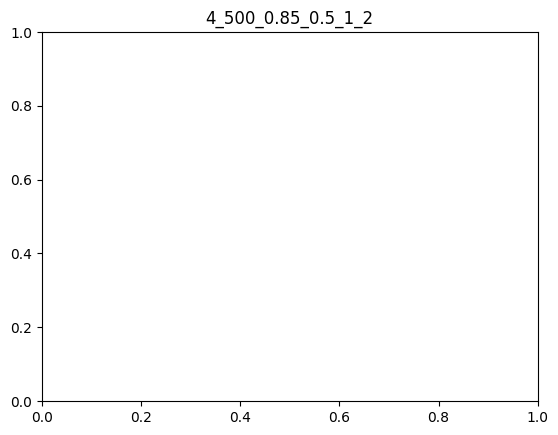

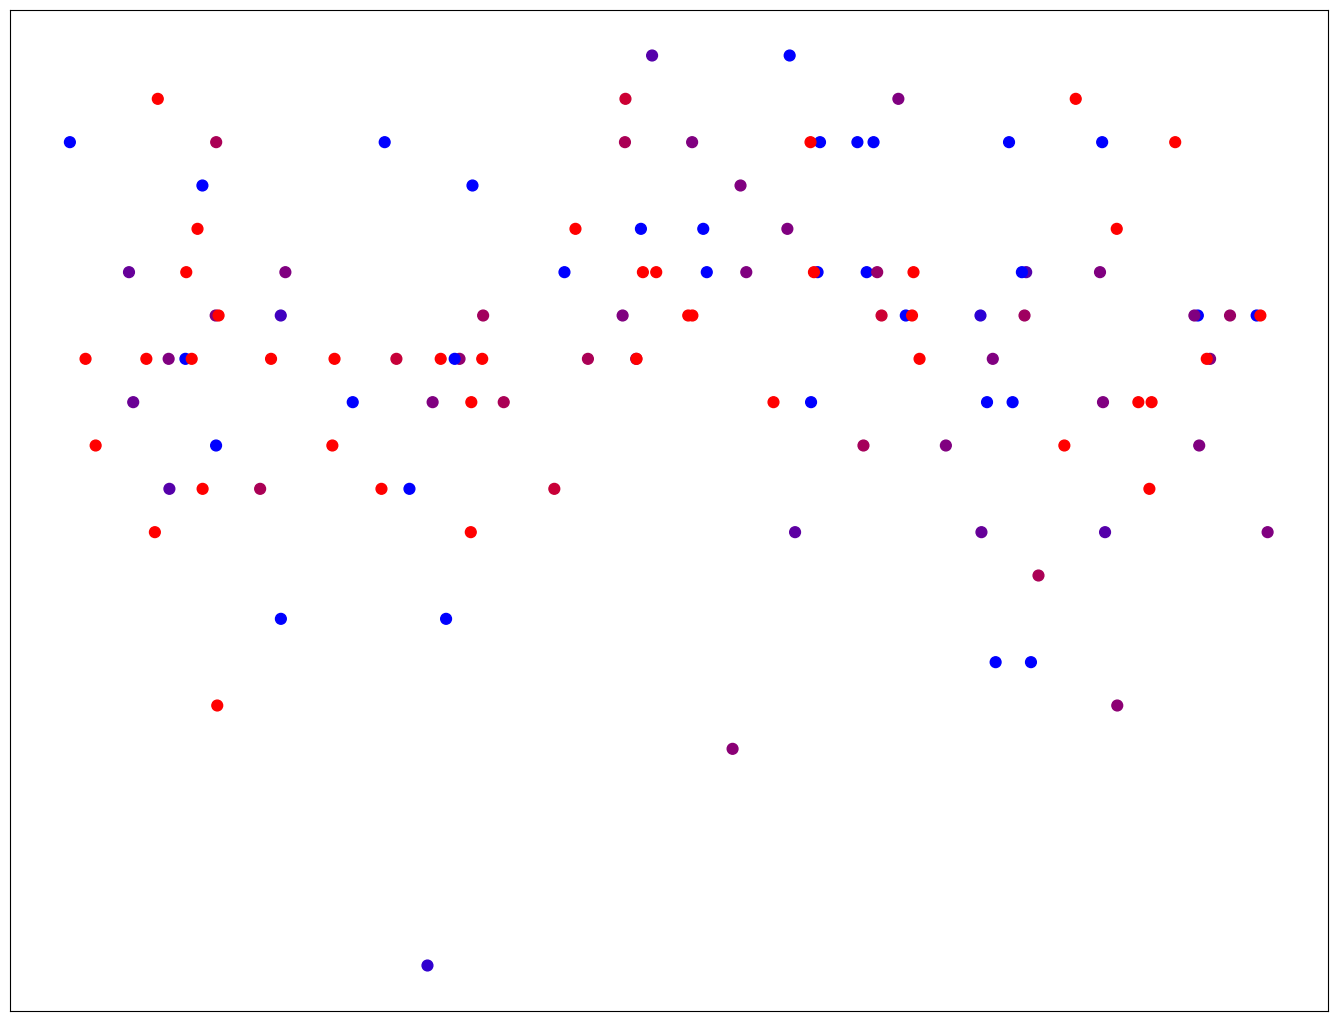

Keys: 121


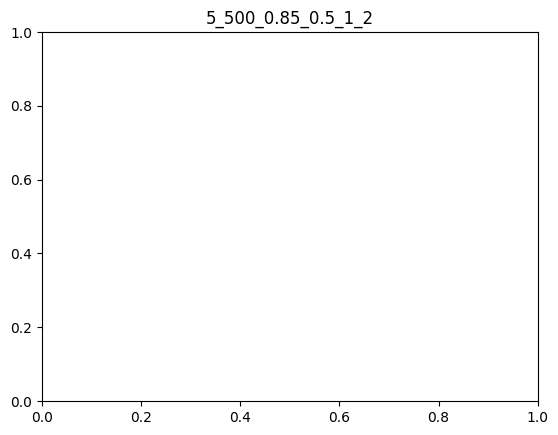

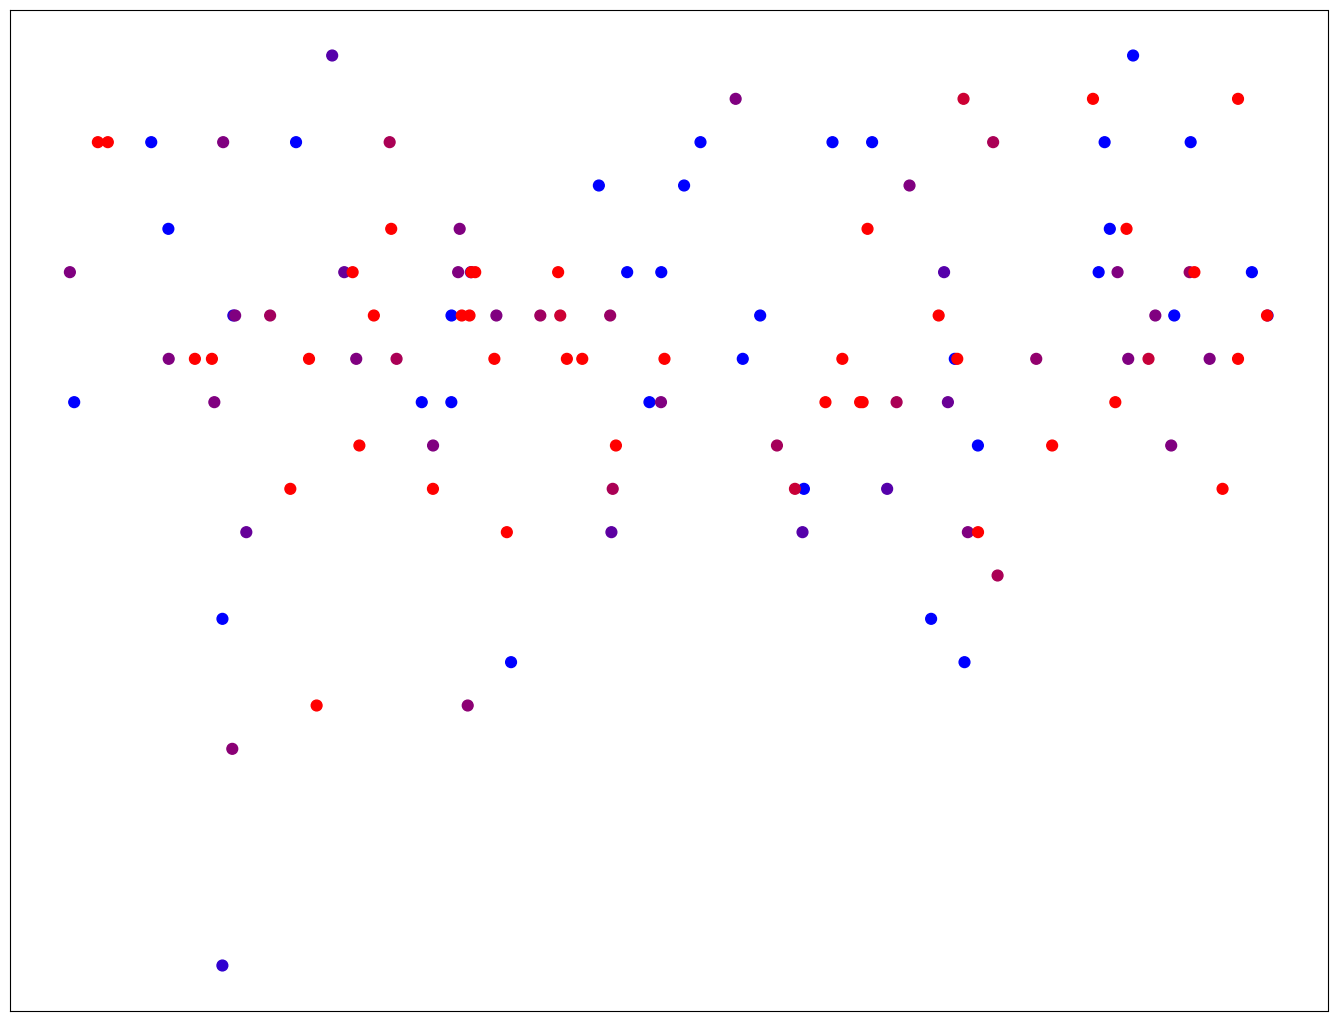

In [3]:
for k, v in hierarchies.items():
    fig = plt.figure(figsize=(17, 13))
    plt.title(k)
    draw_graph(hierarchy, plt)
    plt.show()